# <font color='blue'> i. Perkenalan </font>

## <font color='green'> Milestones 2 </font>

* ### Nama : Mangara Haposan Immanuel Siagian
* ### Batch : 19

### <font color='green'> Objective </font>
`Memprediksi Kekuatan Beton` dengan dataset yang disediakan.

### <font color='green'> Latar Belakang </font>
Kekuatan beton adalah salah satu faktor penting dalam industri konstruksi. Menentukan kekuatan beton dengan baik dapat membantu kontraktor dan konsultan pembangunan untuk membuat keputusan yang lebih baik dalam merancang struktur bangunan, memilih material, dan memastikan keamanan bangunan. Namun, menguji kekuatan beton secara langsung bisa memakan waktu dan biaya yang cukup besar. Oleh karena itu, dilakukan analisa prediksi kekuatan beton menggunakan Machine Learning.

### <font color='green'> Penjelasan Dataset </font>
Dataset yang digunakan merupakan `dataset` yang didapat dari Kaggle mengenai `Kekuatan Beton`.

# <font color='blue'> ii. Import Libraries </font>

In [1]:
# Import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import json

# <font color='blue'> iii. Data Loading </font>

In [2]:
# Import data yang ingin diolah
data_m = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\data_milestone2\h8dsft_P1M2_Mangara_Siagian.csv')

In [3]:
# Menampilkan 10 data pertama
data_m.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
# Menampilkan 10 data terakhir
data_m.tail(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.88
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
# Menghapus baris yang tidak memiliki nilai & memiliki nilai duplikat
data = data_m.dropna().drop_duplicates()

Penghapusan baris dilakukan untuk mendapatkan nilai semurni mungkin.

In [6]:
# Pengkategorian data variabel
cat_cols = list(data.select_dtypes(include='object'))

In [7]:
# Pengkategorian data numerik
num_cols = data.columns[data.dtypes != 'object'].tolist()

# <font color='blue'> iv. Exploratory Data Analysis (EDA) </font>

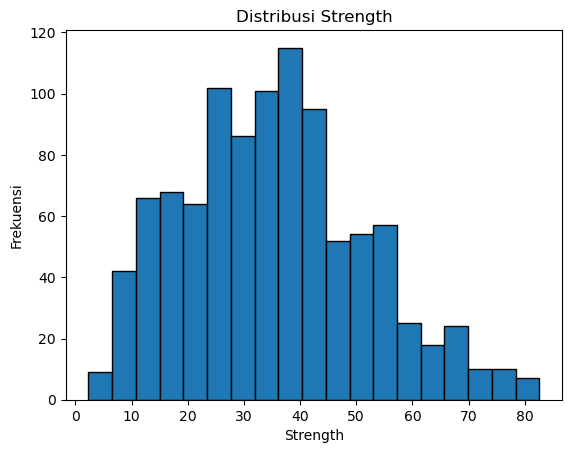

In [8]:
# Membuat Histogram Distribusi Strength
plt.hist(data['Strength'], bins='auto', edgecolor='black')
plt.xlabel('Strength')
plt.ylabel('Frekuensi')
plt.title('Distribusi Strength')
plt.show()

Dari Grafik dapat disimpulkan bahwa jumlah Strength yang paling banyak diperoleh diantara 35-40.

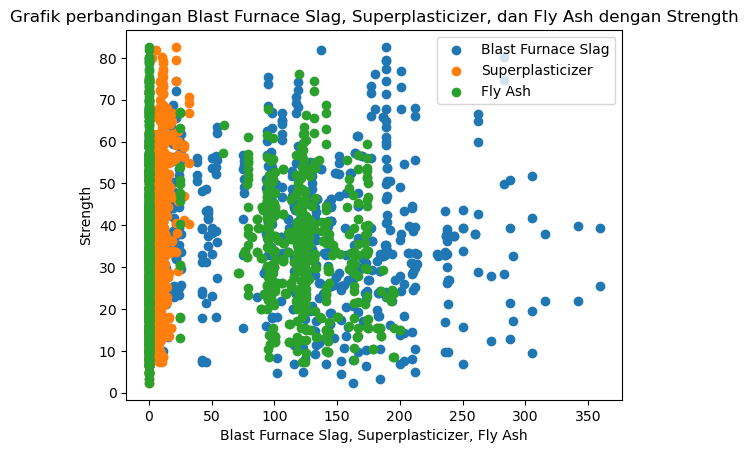

In [9]:
# Membuat Grafik perbandingan Blast Furnace Slag, Superplasticizer, dan Fly Ash dengan Strength
fig, ax = plt.subplots()
ax.scatter(data['Blast Furnace Slag'], data['Strength'], label='Blast Furnace Slag')
ax.scatter(data['Superplasticizer'], data['Strength'], label='Superplasticizer')
ax.scatter(data['Fly Ash'], data['Strength'], label='Fly Ash')
ax.legend()
ax.set_xlabel('Blast Furnace Slag, Superplasticizer, Fly Ash')
ax.set_ylabel('Strength')  
ax.set_title('Grafik perbandingan Blast Furnace Slag, Superplasticizer, dan Fly Ash dengan Strength')
plt.show()

Dari Grafik dapat disimpulkan bahwa jumlah Superplasticizer sangat berpengaruh terhadap Strength.

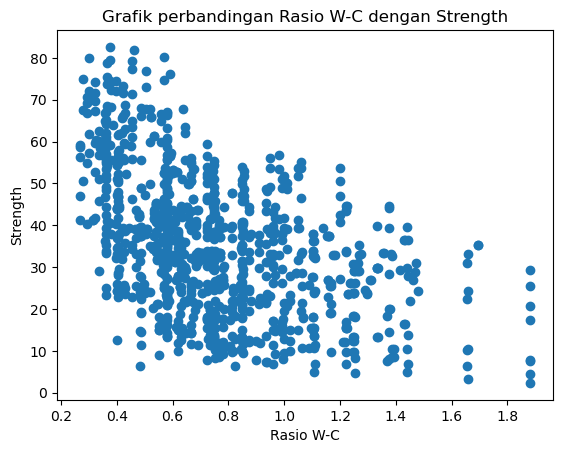

In [10]:
# Membuat Grafik perbandingan Rasio W-C dengan Strength
datarasio = data['Water'] / data['Cement']
plt.scatter(datarasio, data['Strength'])
plt.xlabel('Rasio W-C')
plt.ylabel('Strength')
plt.title('Grafik perbandingan Rasio W-C dengan Strength')
plt.show()

Dari Grafik dapat disimpulkan bahwa jumlah Rasio W-C yang kecil akan mendapatkan Strength yang besar, sebaliknya jika jumlah Rasio W-C yang besar akan mendapatkan Strength yang kecil.

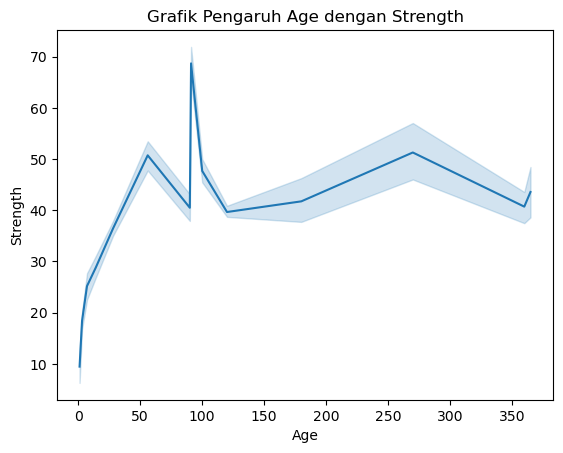

In [11]:
# Membuat Grafik Pengaruh Age dengan Strength
sns.lineplot(data=data, x='Age', y='Strength')
plt.title('Grafik Pengaruh Age dengan Strength')
plt.xlabel('Age')
plt.ylabel('Strength')
plt.show()

Dari Grafik dapat disimpulkan bahwa Age pada 100 hari akan mendapatkan Strength yang signifikan.

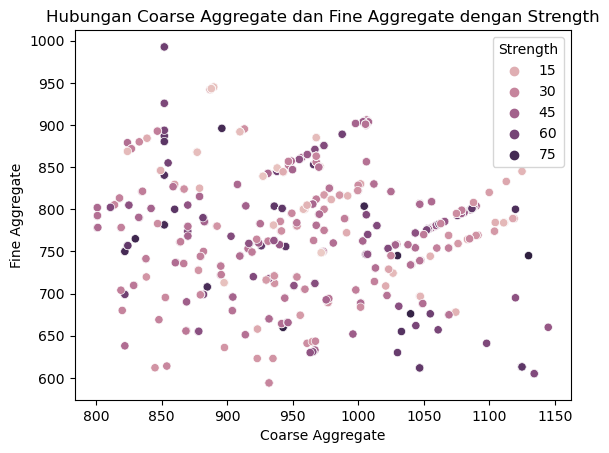

In [12]:
# Grafik hubungan Coarse Aggregate dan Fine Aggregate dengan Strength
sns.scatterplot(x='Coarse Aggregate', y='Fine Aggregate', hue='Strength', data=data)
plt.title('Hubungan Coarse Aggregate dan Fine Aggregate dengan Strength')
plt.xlabel('Coarse Aggregate')
plt.ylabel('Fine Aggregate')
plt.show()

Dari Grafik dapat disimpulkan bahwa nilai Coarse Aggregate dan Fine Aggregate yang besar berkemungkinan mendapatkan nilai Strength yang signifikan.

# <font color='blue'> v. Feature Engineering </font>

In [13]:
# Pengecekan nilai cardinality untuk masing-masing kolom
data.nunique()

Cement                278
Blast Furnace Slag    185
Fly Ash               156
Water                 195
Superplasticizer      111
Coarse Aggregate      284
Fine Aggregate        302
Age                    14
Strength              845
dtype: int64

**Handling Cardinality** dilakukan dengan cara **Feature Selection**.

### <font color='green'> a. FEATURE SELECTION </font>

Mencari korelasi menggunakan metode **Pearson** dikarenakan membandingkan antara **Kolom Numerik** dengan **Kolom Numerik**.

In [14]:
# Menghitung Korelasi dengan menggunakan metode Pearson
data.corr(method='pearson')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast Furnace Slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly Ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse Aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine Aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


Mencari korelasi menggunakan metode **VIF**.

In [15]:
# Menghitung nilai VIF
def calc_vif(nilai):
    vif = pd.DataFrame()
    vif["variables"] = nilai.columns
    vif["VIF"] = [variance_inflation_factor(nilai.values, i) for i in range(nilai.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

calc_vif(data)

,variables,VIF
3,Water,91.426275
5,Coarse Aggregate,85.592680
6,Fine Aggregate,73.251477
0,Cement,25.766123
8,Strength,14.358368
4,Superplasticizer,5.217955
2,Fly Ash,4.598803
1,Blast Furnace Slag,4.311762
7,Age,2.432255


Berdasarkan hasil korelasi:

### **Pearson**

digunakan kolom:
* <font color='green'> Cement </font>
* <font color='green'> Age </font>
* <font color='green'> Superplasticizer </font>

sebagai fitur dikarenakan nilai **Korelasinya tinggi** yang artinya berdampak **Signifikan** terhadap kolom strength.

### **VIF**

digunakan kolom:
* <font color='green'> Fly Ash </font>
* <font color='green'> Blast Furnace Slag </font>

sebagai fitur dikarenakan nilai **VIFnya rendah** yang artinya berdampak **tidak Signifikan** terhadap kolom lain.

In [16]:
# Pemilihan fitur yang digunakan
final_fitur = ['Cement','Age','Superplasticizer','Fly Ash','Blast Furnace Slag','Strength']

In [17]:
# Penyesuaian data berdasarkan fitur
dataf = data[final_fitur]
dataf.head(1)

,Cement,Age,Superplasticizer,Fly Ash,Blast Furnace Slag,Strength
0,540.0,28,2.5,0.0,0.0,79.99


### <font color='green'> b. DATA SPLITTING </font>

In [18]:
# Proses pemisahan data independen (x) dan data dependen (y)
x = dataf.drop('Strength', axis=1)
y = dataf['Strength']

In [19]:
# Proses pemodelan Train dan Test menggunakan Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
print(f'train size: {x_train.shape}')
print(f'test size: {x_test.shape}')

train size: (603, 5)
test size: (402, 5)


In [20]:
# Proses mereset index agar dimulai dari 0
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### <font color='green'> c. HANDLING OUTLIER </font>

In [21]:
# Melihat nilai skew pada tiap kolom numerik
x_train[['Cement','Age','Superplasticizer','Fly Ash','Blast Furnace Slag']].skew()

Cement                0.559153
Age                   3.344760
Superplasticizer      0.959016
Fly Ash               0.442461
Blast Furnace Slag    0.824601
dtype: float64

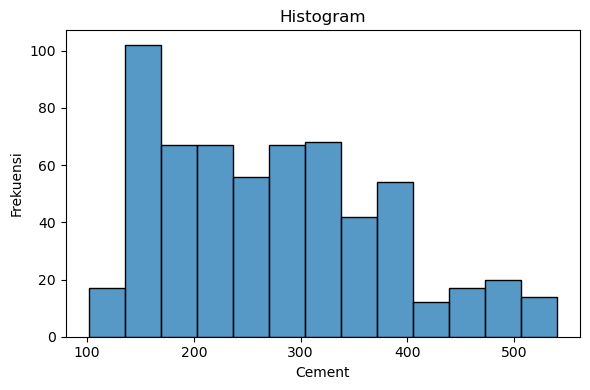

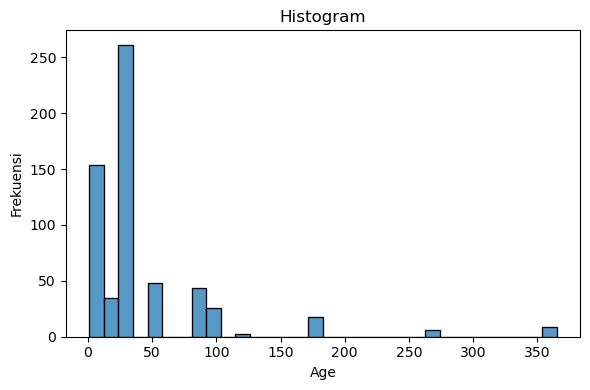

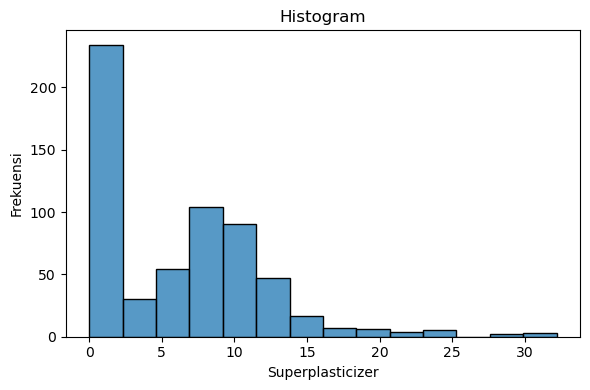

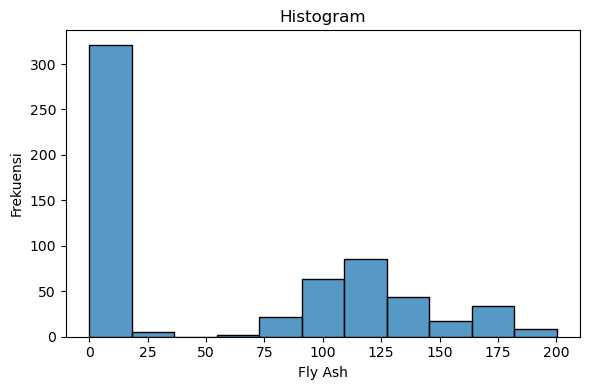

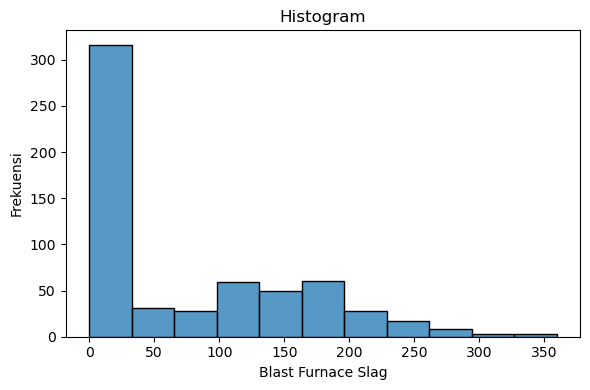

In [22]:
# Melihat Distribusi Outlier
for column in x_train.columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(x_train[column], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frekuensi')
    ax.set_title('Histogram')
    plt.tight_layout()
    plt.show()

Kolom **Age** memiliki nilai **Skew Tinggi** dan **Tidak Terdistribusi Normal**, oleh sebab itu dilakukan **Handling Outlier** menggunakan metode **IQR**.

In [23]:
# Pembuatan fungsi untuk mendeteksi outlier
def find_normal_boundaries(x_train, var):
    upper_boundary = x_train[var].mean() + 3 * x_train[var].std()
    lower_boundary = x_train[var].mean() - 3 * x_train[var].std()
    return upper_boundary, lower_boundary

In [24]:
# Mencari nilai outlier sesuai data yang dimasukkan
upper_boundary1, lower_boundary1 = find_normal_boundaries(x_train, 'Age')

In [25]:
# Menghilangkan nilai outlier sesuai data yang dimasukkan
x_train_no = x_train[~(
                (x_train['Age'] > upper_boundary1) | (x_train['Age'] < lower_boundary1) 
               )]
y_train_no = y_train[~(
                (x_train['Age'] > upper_boundary1) | (x_train['Age'] < lower_boundary1) 
               )]

### <font color='green'> d. SCALING </font>

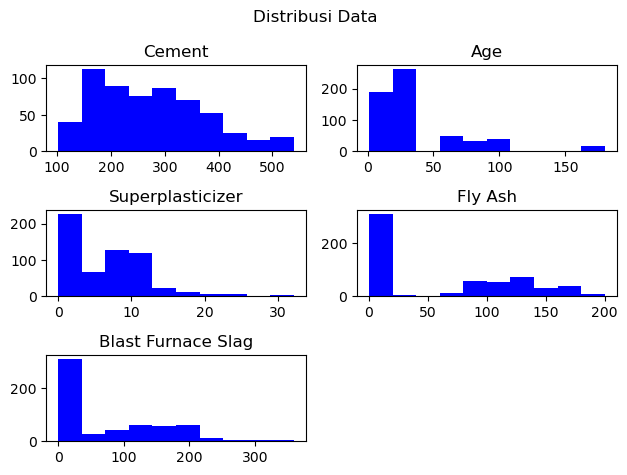

In [26]:
# Grafik distribusi data
x_train_no.hist(grid=False, color='blue', bins=10)
plt.suptitle('Distribusi Data')
plt.tight_layout()
plt.show()

In [27]:
# Membuat variabel baru
x_train_new = x_train_no.copy()
x_test_new = x_test.copy()

In [28]:
# Pemilihan data independen yang ingin di scaling
sc = ['Cement','Age','Superplasticizer','Fly Ash','Blast Furnace Slag']

# Proses scaling data menggunakan MinMaxScaler
mm = MinMaxScaler()
x_train_new[sc] = mm.fit_transform(x_train_new[sc])
x_test_new[sc] = mm.transform(x_test_new[sc])

**MinMaxScaler** digunakan karena data semua kolom **Tidak Terdistribusi Normal**.

### <font color='green'> e. ENCODING </font>

**Encoding** tidak digunakan untuk mengubah data karena **Tidak Ada Kolom Kategorik**.

### <font color='green'> f. REDUKSI DIMENSI </font>

**Reduksi Dimensi** tidak digunakan untuk mengubah data karena **Jumlah Kolom Sedikit**.

# <font color='blue'> vi. Model Definition </font>

Membuat model **Regresi** menggunakan **Regresi Linear**, **SVR**, **Decision Tree Regression**, dan **Random Forest Regression**. Adapun pencarian Model terbaik dilakukan dengan cara menggunakan Cross-Validation sesuai dengan kode dibawah:

# <font color='blue'> vii. Model Training </font>

In [29]:
# Melakukan cross-validation pada tiap pemodelan
nilairl = cross_val_score(LinearRegression(), x_train_new, y_train_no, cv=5)
nilaisvr = cross_val_score(SVR(), x_train_new, y_train_no, cv=5)
nilaidtr = cross_val_score(DecisionTreeRegressor(), x_train_new, y_train_no, cv=5)
nilairfr = cross_val_score(RandomForestRegressor(), x_train_new, y_train_no, cv=5)

# Mencari nilai performansi dari tiap pemodelan
meanrl = nilairl.mean()
stdrl = nilairl.std()
meansvr = nilaisvr.mean()
stdsvr = nilaisvr.std()
meandtr = nilaidtr.mean()
stddtr = nilaidtr.std()
meanrfr = nilairfr.mean()
stdrfr = nilairfr.std()

# Membuat DataFrame hasil cross-validation dari tiap model
datacv = {
    'Model': ['Regresi Linear', 'SVR', 'Decision Tree Regression', 'Random Forest Regression'],
    'Mean Score': [meanrl, meansvr, meandtr, meanrfr],
    'Std Score': [stdrl, stdsvr, stddtr, stdrfr]
}
pd.DataFrame(datacv)

,Model,Mean Score,Std Score
0,Regresi Linear,0.655800,0.025847
1,SVR,0.641703,0.030900
2,Decision Tree Regression,0.778905,0.028563
3,Random Forest Regression,0.855529,0.006746


Dari hasil Cross-Validation didapatkan Model **Random Forest Regression** adalah model terbaik dikarenakan memiliki **Nilai Mean** paling **Tinggi** dan **Nilai Std** yang paling **Rendah**. Selanjutnya, dilakukan pencarian **Hyperparameter terkait** pada Model **Random Forest Regression** sesuai dengan kode dibawah:

### Random Forest Regression

In [30]:
# Pendefenisian Hyperparameter Random Forest Regression
criterion = ['friedman_mse', 'absolute_error', 'squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
max_features = ['sqrt', 'log2']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 4, 8]
 
rfr_grid = {
          'criterion': criterion,
          'max_depth': max_depth, 
          'max_features': max_features,  
          'min_samples_leaf': min_samples_leaf, 
          'min_samples_split': min_samples_split, 
          }

# Grid Search
rfr_gridss = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rfr_grid, cv=5)
rfr_gridss.fit(x_train_new, y_train_no)

# Hyperparameter Random Forest Regression terbaik menurut Grid Search
rfr_gridss.best_params_

{'criterion': 'absolute_error',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Dari hasil **GridSearch** didapatkan parameter terbaik yaitu:

* Criterion : `Absolute Error`
* Max Depth : `100`
* Max Features : `Sqrt`
* Min Samples Leaf : `1`
* Min Samples Split : `2`

Dimana hasil **Grid Search** tersebut lebih **Akurat** dibandingkan hasil **Randomized Search**, walaupun dengan menggunakan **Grid Search** akan membutuhkan **Waktu** pemrosesan yang lebih **Lama**.

In [31]:
# Pemodelan Random Forest Regression menggunakan Scikit-learn
model_rfr = Pipeline([('Scaler', mm), ('Model', RandomForestRegressor(criterion = 'absolute_error', max_depth = 100, 
                                                                      max_features = 'sqrt', min_samples_leaf = 1, 
                                                                      min_samples_split = 2))])
model_rfr.fit(x_train_new, y_train_no)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Model',
                 RandomForestRegressor(criterion='absolute_error',
                                       max_depth=100, max_features='sqrt'))])

# <font color='blue'> viii. Model Evaluation </font>

In [32]:
# Perhitungan nilai error menggunakan Random Forest Regression

print('-------- TRAIN ---------')
y_train_pred = model_rfr.predict(x_train_new)
print('MAE:',mean_absolute_error(y_train_no, y_train_pred))
print('MSE:',mean_squared_error(y_train_no, y_train_pred))
print('RMSE:',mean_squared_error(y_train_no, y_train_pred,squared=False))

print('-------- TEST ---------')
y_test_pred = model_rfr.predict(x_test_new)
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',mean_squared_error(y_test, y_test_pred,squared=False))

-------- TRAIN ---------
MAE: 1.8557452380952377
MSE: 6.811458656581629
RMSE: 2.6098771343842277
-------- TEST ---------
MAE: 4.534940547263683
MSE: 41.33908969723881
RMSE: 6.429548172091007


Dari perbandingan tersebut, terlihat bahwa **Kesalahan** pada data **TEST** lebih **Tinggi** daripada kesalahan pada data **TRAIN**. Hal ini menunjukkan bahwa **Model** mungkin mengalami **Over Fit**.

# <font color='blue'> ix. Model Saving </font>

In [33]:
# Proses penyimpanan model
with open('model_rfr.pkl', 'wb') as file_1:
  joblib.dump(model_rfr, file_1)

# <font color='blue'> xi. Pengambilan Kesimpulan </font>

### Berdasarkan hasil **EDA** didapat informasi:
* bahwa jumlah Strength yang paling banyak diperoleh diantara 35-40.
* bahwa jumlah Superplasticizer sangat berpengaruh terhadap Strength.
* bahwa jumlah Rasio W-C yang kecil akan mendapatkan Strength yang besar, sebaliknya jika jumlah Rasio W-C yang besar akan mendapatkan Strength yang kecil.
* bahwa Age pada 100 hari akan mendapatkan Strength yang signifikan.
* bahwa nilai Coarse Aggregate dan Fine Aggregate yang besar berkemungkinan mendapatkan nilai Strength yang signifikan.

Dengan menggunakan <font color='purple'> **Perbandingan Data Splitting** </font> antara data train dengan data test adalah <font color='purple'> **60:40** </font> dan juga dengan menggunakan <font color='blue'> Data/Fitur: **Cement, Age, Superplasticizer, Fly Ash, dan Blast Furnace Slag** </font> akan mendapatkan hasil yang lebih baik dibandingkan menggunakan data/fitur dari kolom lain.

Digunakan model **Random Forest Regression** karena memiliki <font color='green'> **Nilai Mean** </font> yang paling <font color='green'> **Tinggi** </font> dan <font color='green'> **Nilai Std** </font> yang paling <font color='green'> **Rendah** </font> pada data daripada menggunakan model **Lainnya**.

Dari data didapat:

Jika <font color='green'> **Nilai Test Rata-Rata Aktual** </font> adalah <font color='green'> **36.492** </font> dan <font color='green'> **Nilai Test Rata-Rata Prediksi** </font> adalah <font color='green'> **35.455** </font>, dengan <font color='green'> **Std** </font> sebesar <font color='green'> **0.017** </font>, perbedaan sebesar <font color='green'> **1.037** </font> dapat dianggap relatif <font color='green'> **Kecil** </font>. Hal ini menunjukkan bahwa model mungkin memiliki performa yang lebih baik dalam memprediksi data dengan variasi yang lebih rendah atau ketika nilai aktual cenderung mendekati rata-rata prediksi, seperti pada grafik dibawah.

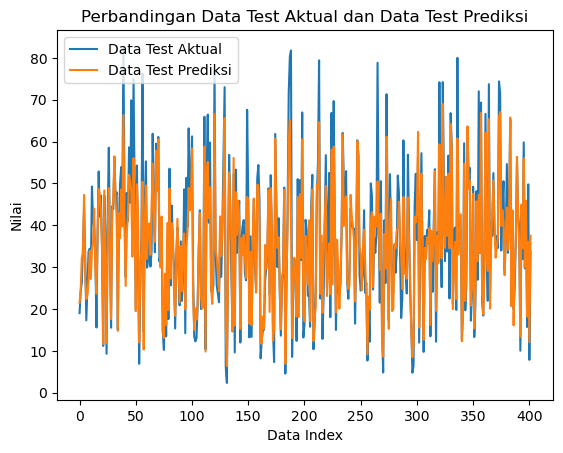

In [34]:
# Grafik Perbandingan Data Test Aktual dan Data Test Prediksi
plt.plot(y_test, label='Data Test Aktual')
plt.plot(y_test_pred, label='Data Test Prediksi')
plt.xlabel('Data Index')
plt.ylabel('Nilai')
plt.title('Perbandingan Data Test Aktual dan Data Test Prediksi')
plt.legend()
plt.show()

### <font color='purple'> **Kelebihan** </font> dari model **Random Forest Regression** adalah:
* Dapat memproses data dengan lebih <font color='green'> **Akurat** </font>.

### <font color='purple'> **Kelemahan** </font> dari model **Random Forest Regression** adalah:
* Hasil yang diberikan cenderung <font color='red'> **Over Fit** </font>, jika tidak ditentukan Hyperparameter/batasannya.

Bagi Penyedia Beton, **Model ini sudah layak digunakan**. Hal ini dikarenakan umumnya para Penyedia Beton menggunakan campuran yang sudah Fixed, sehingga jika hasilnya Over Fit dapat diabaikan.

Untuk mencapai hasil yang lebih baik lagi dapat dilakukan <font color='purple'> **Peningkatan Model** </font>.

### Untuk melakukan <font color='purple'> **Peningkatan Model** </font>, hal yang bisa dilakukan antara lain:

* <font color='green'> Menggunakan algoritma yang lebih kompleks. </font>
* <font color='green'> Menambah lebih banyak fitur. </font>
* <font color='green'> Melakukan preprocessing data dengan lebih baik. </font>